<a href="https://colab.research.google.com/github/Sophie1218/-n-HMTK/blob/main/Code_RunModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and Install libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings 
  
warnings.filterwarnings(action = 'ignore') 

In [38]:
import os
import time
import string
import random
import wordcloud
import seaborn as sns
import pandas as pd
import numpy as np
import numpy as np
import matplotlib
import regex as re
import matplotlib.pyplot as plt

import torch
from tqdm import tqdm_notebook
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from tensorflow.keras.preprocessing.sequence import pad_sequences
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

In [4]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Bert_Complaint')

In [5]:
!nvidia-smi

Sat Dec 12 10:55:56 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
!pip install transformers

     |████████████████████████████████| 1.4MB 5.7MB/s 
     |████████████████████████████████| 2.9MB 20.8MB/s 
     |████████████████████████████████| 890kB 38.7MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=ac98b5f96e41bacb3484a159fcf6524c9eb420c0fbf419043db05f5eb6bc6ead
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [7]:
!pip install fastBPE
!pip install fairseq

  Created wheel for fastBPE: filename=fastBPE-0.1.0-cp36-cp36m-linux_x86_64.whl size=481516 sha256=4c9be63779780b7621f4112f80683847668bcae7bac350118444560fdcd97ca9
  Stored in directory: /root/.cache/pip/wheels/f3/0c/9c/fc62058b4d473a5602bcd3d3edfece796f123875379ea82d79
Successfully built fastBPE
     |████████████████████████████████| 1.7MB 4.5MB/s 
     |████████████████████████████████| 122kB 18.1MB/s 
     |████████████████████████████████| 71kB 6.5MB/s 
     |████████████████████████████████| 112kB 13.2MB/s 
     |████████████████████████████████| 276kB 17.6MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-cp36-none-any.whl size=141231 sha256=da2bf3816e37a687e15cccdb0685000fabeeaf9f34be34146b5c3df9e15a27bf
  Stored in directory: /root/.cache/pip/wheels/e3/e2/fa/b78480b448b8579ddf393bebd3f47ee23aa84c89b6a78285c8
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44620 sha256=d72637b6a32fa19eca09a2b8056ed52fd1bf12cb

In [8]:
!pip install vncorenlp

     |████████████████████████████████| 2.7MB 5.6MB/s 
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-cp36-none-any.whl size=2645934 sha256=0c07a0e4e742d609df6599de98eac1d5d2b6eaf15e909a2e0e8655d29bd529cb
  Stored in directory: /root/.cache/pip/wheels/09/54/8b/043667de6091d06a381d7745f44174504a9a4a56ecc9380c54
Successfully built vncorenlp


In [9]:
!pip install transformers-phobert

     |████████████████████████████████| 778kB 5.5MB/s 
     |████████████████████████████████| 3.0MB 18.0MB/s 
     |████████████████████████████████| 1.1MB 32.8MB/s 
  Created wheel for transformers-phobert: filename=transformers_phobert-3.1.2-cp36-none-any.whl size=937535 sha256=ff54498e700e7ca03ff3923da519df5c1ae12c5b1b2d370f63c49c94d9fd8469
  Stored in directory: /root/.cache/pip/wheels/cd/cc/58/e17df0c3e8a761f126c5864f29aa299559a14698ab78e3e825
Successfully built transformers-phobert
ERROR: transformers 4.0.1 has requirement tokenizers==0.9.4, but you'll have tokenizers 0.8.1rc2 which is incompatible.
  Found existing installation: tokenizers 0.9.4
    Uninstalling tokenizers-0.9.4:
      Successfully uninstalled tokenizers-0.9.4


In [10]:
from vncorenlp import VnCoreNLP
rdrsegmenter = VnCoreNLP("/content/drive/MyDrive/Colab Notebooks/VnCoreNLP-master/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m') 

In [11]:
from fairseq.data.encoders.fastbpe import fastBPE
from fairseq.data import Dictionary
import argparse

parser = argparse.ArgumentParser()
parser.add_argument('--bpe-codes', 
    default="/content/drive/MyDrive/Colab Notebooks/PhoBERT_base_transformers/PhoBERT_base_transformers/bpe.codes",
    required=False,
    type=str,
    help='path to fastBPE BPE'
)
args, unknown = parser.parse_known_args()
bpe = fastBPE(args)

# Load the dictionary
vocab = Dictionary()
vocab.add_from_file("/content/drive/MyDrive/Colab Notebooks/PhoBERT_base_transformers/PhoBERT_base_transformers/dict.txt")

In [12]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bert_Complaint/Dataset_DL.csv')
df.head()

,ID,Comment,Label,Domain
0,1117661425258766_1117711878587054,Tắt Ai tự động nhận diện ảnh kiểu gì ak,0,Điện thoại
1,1117661425258766_1117711881920387,So sánh với Nokia 8.1,0,Điện thoại
2,1117661425258766_1117712271920348,A51 vs reno 2F máy nào tốt hơn a,0,Điện thoại
3,1117661425258766_1117712698586972,Giật nhỉ :)),1,Điện thoại
4,1117661425258766_1117712938586948,"Mới toang con 7plus,hôm qua ra làm luôn con nà...",1,Điện thoại



# Preprocess data

In [13]:
uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"
 
def loaddicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic
dicchar = loaddicchar()

def convert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

bang_nguyen_am = [['a', 'à', 'á', 'ả', 'ã', 'ạ', 'a'],
                  ['ă', 'ằ', 'ắ', 'ẳ', 'ẵ', 'ặ', 'aw'],
                  ['â', 'ầ', 'ấ', 'ẩ', 'ẫ', 'ậ', 'aa'],
                  ['e', 'è', 'é', 'ẻ', 'ẽ', 'ẹ', 'e'],
                  ['ê', 'ề', 'ế', 'ể', 'ễ', 'ệ', 'ee'],
                  ['i', 'ì', 'í', 'ỉ', 'ĩ', 'ị', 'i'],
                  ['o', 'ò', 'ó', 'ỏ', 'õ', 'ọ', 'o'],
                  ['ô', 'ồ', 'ố', 'ổ', 'ỗ', 'ộ', 'oo'],
                  ['ơ', 'ờ', 'ớ', 'ở', 'ỡ', 'ợ', 'ow'],
                  ['u', 'ù', 'ú', 'ủ', 'ũ', 'ụ', 'u'],
                  ['ư', 'ừ', 'ứ', 'ử', 'ữ', 'ự', 'uw'],
                  ['y', 'ỳ', 'ý', 'ỷ', 'ỹ', 'ỵ', 'y']]
bang_ky_tu_dau = ['', 'f', 's', 'r', 'x', 'j']

nguyen_am_to_ids = {}

for i in range(len(bang_nguyen_am)):
    for j in range(len(bang_nguyen_am[i]) - 1):
        nguyen_am_to_ids[bang_nguyen_am[i][j]] = (i, j)

def chuan_hoa_dau_tu_tieng_viet(word):
    if not is_valid_vietnam_word(word):
        return word

    chars = list(word)
    dau_cau = 0
    nguyen_am_index = []
    qu_or_gi = False
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x == -1:
            continue
        elif x == 9:  # check qu
            if index != 0 and chars[index - 1] == 'q':
                chars[index] = 'u'
                qu_or_gi = True
        elif x == 5:  # check gi
            if index != 0 and chars[index - 1] == 'g':
                chars[index] = 'i'
                qu_or_gi = True
        if y != 0:
            dau_cau = y
            chars[index] = bang_nguyen_am[x][0]
        if not qu_or_gi or index != 1:
            nguyen_am_index.append(index)
    if len(nguyen_am_index) < 2:
        if qu_or_gi:
            if len(chars) == 2:
                x, y = nguyen_am_to_ids.get(chars[1])
                chars[1] = bang_nguyen_am[x][dau_cau]
            else:
                x, y = nguyen_am_to_ids.get(chars[2], (-1, -1))
                if x != -1:
                    chars[2] = bang_nguyen_am[x][dau_cau]
                else:
                    chars[1] = bang_nguyen_am[5][dau_cau] if chars[1] == 'i' else bang_nguyen_am[9][dau_cau]
            return ''.join(chars)
        return word

    for index in nguyen_am_index:
        x, y = nguyen_am_to_ids[chars[index]]
        if x == 4 or x == 8:  # ê, ơ
            chars[index] = bang_nguyen_am[x][dau_cau]
            # for index2 in nguyen_am_index:
            #     if index2 != index:
            #         x, y = nguyen_am_to_ids[chars[index]]
            #         chars[index2] = bang_nguyen_am[x][0]
            return ''.join(chars)

    if len(nguyen_am_index) == 2:
        if nguyen_am_index[-1] == len(chars) - 1:
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            chars[nguyen_am_index[0]] = bang_nguyen_am[x][dau_cau]
            # x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            # chars[nguyen_am_index[1]] = bang_nguyen_am[x][0]
        else:
            # x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            # chars[nguyen_am_index[0]] = bang_nguyen_am[x][0]
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
    else:
        # x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
        # chars[nguyen_am_index[0]] = bang_nguyen_am[x][0]
        x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
        chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
        # x, y = nguyen_am_to_ids[chars[nguyen_am_index[2]]]
        # chars[nguyen_am_index[2]] = bang_nguyen_am[x][0]
    return ''.join(chars)


def is_valid_vietnam_word(word):
    chars = list(word)
    nguyen_am_index = -1
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x != -1:
            if nguyen_am_index == -1:
                nguyen_am_index = index
            else:
                if index - nguyen_am_index != 1:
                    return False
                nguyen_am_index = index
    return True


def chuan_hoa_dau_cau_tieng_viet(sentence):
    """
        Chuyển câu tiếng việt về chuẩn gõ dấu kiểu cũ.
        :param sentence:
        :return:
        """
    sentence = sentence.lower()
    words = sentence.split()
    for index, word in enumerate(words):
        cw = re.sub(r'(^\p{P}*)([p{L}.]*\p{L}+)(\p{P}*$)', r'\1/\2/\3', word).split('/')
        # print(cw)
        if len(cw) == 3:
            cw[1] = chuan_hoa_dau_tu_tieng_viet(cw[1])
        words[index] = ''.join(cw)
    return ' '.join(words)

def remove_html(txt):
    return re.sub(r'<[^>]*>', '', txt)

In [14]:
def text_preprocess(document):
    # delete html code
    document = remove_html(document)
    # standardized unicode
    document = convert_unicode(document)
    # standardized typing Vietnamese accents
    document = chuan_hoa_dau_cau_tieng_viet(document)
    # lower
    document = document.lower()
    # delete unnecessary characters 
    document = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]',' ',document)
    # delete extra spaces
    document = re.sub(r'\s+', ' ', document).strip()
    return document

In [15]:
df["Comment"] = df["Comment"].apply(text_preprocess)

In [16]:

abbr_dict={'k':'không','t':'tôi','fb':'facebook','mess':'messenger','mn':'mọi người','gr':'group','dc':'được','ko':'không','mng':'mọi người','cty':'công ty','1':'một','ngta':'người ta','ng':'người','oki':'ok','thg':'thường','vn':'việt nam','tq':'trung quốc','insta':'instagram','connect':'kết nối','user':'người dùng','h':'giờ','nt':'nhắn tin','dth':'dễ thương','đt':'điện thoại','qc':'quảng cáo','pr':'quảng cáo','ae':'anh em','trung':'trung quốc','tk':'tài khoản','mị':'tôi','chăn rau':'gạ gẫm','ny':'người yêu','lq':'game','wa':'quá','ak':'á','í':'ý','ms':'mới','ip':'iphone','apple':'iphone','kh':'không','cùi':'tệ','dg':'đang','ms':'mới','vs':'với','lm':'làm','bik':'biết','tàu':'trung quốc','tn':'tin nhắn','comment':'bình luận','ng':'người','app':'ứng dụng','u.d':'ứng dụng','j':'gì','mk':'tôi','inb':'nhắn tin','nick':'tài khoản','cmt':'bình luận','update':'nâng cấp','hk':'hông','hoy':'thôi','xh':'xã hội','ntn':'như thế nào',
'gr':'group','mxh':'mạng xã hội','đc':'được','ko':'không','fb':'facebook','zl':'zalo','tw':'twitter','tele':'telegram','t':'tôi','mng':'mọi người','ng':'người','nma':'nhưng mà','cty':'công ty','vidcall':'video call','acc':'account','tumblr':'tumbler',
'mn':'mọi người','ngta':'người ta','hong':'không','vn':'Việt Nam','vl':'quá trời','cm':'chúng mày','tq':'Trung Quốc','thg':'thường','face':'facebook','hs':'Hoàng Sa','ts':'Trường Sa','vn':'Việt Nam','tq':'Trung Quốc','nn':'nước ngoài','dn':'doanh nghiệp',
'fb':'facebook','bt':'biết','vs':'với','pr':'quảng cáo','dth':'dễ thương','sx':'sản xuất','vn':'Việt Nam','pỏn':'porn','ig':'instagram','klq':'không liên quan',
'mobi':'mobile','ae':'anh em','ny':'người yêu','nhứt':'nhất','trc':'trước','zm':'zing me','n':'nhiều','mess':'messenger','tk':'tài khoản','r':'rồi','mị':'mình','ib':'inbox','nf':'new feed','nhug':'nhưng','sđ':'sử dụng','tung của':'Trung Quốc','mer':'mơ','cmt':'comment','j':'gì','4rum':'forum','nyc':'người yêu cũ','đc':'được','dùg':'dùng','dùngg':'dùng','trường cđ':'trường cao đẳng','cae':'cả anh em','Ms':'microsoft',
'nhìu':'nhiều','sv':'sinh viên','hwa':'hôm qua','ae':'anh em','save':'lưu','bank':'ngân hàng','tgioi':'thế giới','méo':'không','ndung':'nội dung','e':'em','áh':'á',
'nf':'new feed','xh':'xã hội','ak':'á','trc':'trước','đb':'đầu bùi','ad':'admin','k':'không','t':'tôi','fb':'facebook','mess':'messenger','mn':'mọi người','gr':'group','dc':'được','ko':'không','mng':'mọi người','cty':'công ty','1':'một','ngta':'người ta','ng':'người','oki':'ok','thg':'thường','vn':'việt nam','tq':'trung quốc','die':'chết','insta':'instagram','connect':'kết nối','user':'người dùng','h':'giờ','nt':'nhắn tin','dth':'dễ thương','đt':'điện thoại','qc':'quảng cáo','pr':'quảng cáo','ae':'anh em','trung':'trung quốc','tk':'tài khoản','mị':'tôi','chăn rau':'gạ gẫm','ny':'người yêu','lq':'game','wa':'quá','ak':'á','í':'ý','ms':'mới','ip':'iphone','apple':'iphone','kh':'không','cùi':'tệ','dg':'đang','ms':'mới','vs':'với','lm':'làm','bik':'biết','tàu':'trung quốc',
'tn':'tin nhắn','comment':'bình luận','ng':'người','app':'ứng dụng','u.d':'ứng dụng','j':'gì','mk':'tôi','inb':'nhắn tin','nick':'tài khoản','cmt':'bình luận','update':'nâng cấp','hk':'hông','hoy':'thôi','xh':'xã hội','ntn':'như thế nào','b':'bạn','sp':'sản phẩm','oki':'ok','dùg':'dùng','hk':'không','nc': 'nước','í': 'ý','e':'em','srm': 'sữa rửa mặt','rv': 'review','kcn': 'kem chống nắng','ttrang': 'tẩy trang','bn':'bao nhiêu','r': 'rồi','ah':'ạ','m': 'mình','oke': 'ok','zới': 'với','rw': 'review','klq': 'không liên quan','sr': 'serum','mp': 'mỹ phẩm','cx':'cũng','cj': 'chị','c':'chị','ttbc': 'tẩy tế bào chết','ng':'người','v': 'vậy','ce': 'chị em','hok': 'không','lquan':'liên quan','nèe': 'nè','bạnn': 'bạn','sis': 'chị','pk': 'biết','sg':'sài gòn','ntn': 'như thế này','bit': 'biết','tnao': 'thế nào','okeee':'ok','ơu': 'ơi','xl': 'xin lỗi','bh': 'bây giờ','hh': 'hỗn hợp','cũngg': 'cũng','hjx': 'hic','tr': 'trời','ln': 'luôn','od': 'đặt hàng','thik': 'thích','ncl': 'nói chung là','ơii': 'ơi','n': 'nó','N':'nó','nhiêud': 'nhiều','ek': 'em','Mội': 'mọi','mjnh': 'mình','bth': 'bình thường','gù': 'gì','rww': 'bình luận','lq': 'liên quan','oie': 'ơi','okela': 'ok','mem': 'bạn','siu':'siêu','Vtm tree': 'nhãn_hiệu','gth': 'giới thiệu','yt': 'youtube','th': 'trường hợp','nhưg': 'nhưng','mrm': 'sữa rửa mặt','ci': 'chị','bt': 'biết','pai': 'phải','ngta': 'người ta','m.n': 'mọi người','ms': 'mới','cx': 'cũng','thíc':'thích','dg': 'đang','tt': 'tẩy trang','kb': 'không biết','hq':'Hàn Quốc','sd':'sử dụng','nc':'nước','lcl':'lỗ chân lông','b':'bạn','r':'rồi','mh':'mình','xog':'xong','nh':'nhiều','c':'chị','r':'rồi','m':'mình','auth':'chính hãng','ah':'ạ','sp':'sản phẩm','bn':'bạn','xg':'xong','mk':'mình','bth':'bình thường','or':'hoặc','m.n':'mọi người','v':'vậy','mrm':'sữa rửa mặt','sr':'serum','ngkhac':'người khác','vsinh':'vệ sinh','mn':'mặt nạ','kh':'không','lun':'luôn','hiu hiu':'khóc','bio':'bio','TO':'The Ordinary','td':'tẩy da','nek':'nè','mìk':'mình','ạk':'ạ','mog':'mong','lsao':'là sao','s':'sao','ak':'á','siu siu':'siêu siêu','cx':'cũng','kp':'không phải','bt':'bình thường','hhtd':'hỗn hợp thiên dầu','ord':'đặt hàng','đc':'được','ợ':'ạ','kp':'không phải','đk':'được','nta':'người ta','hời':'trời ơi','td':'tác dụng','sr':'xin lỗi','ui':'ôi','tt':'tẩy trang','oi':'ơi','kb':'không biết','z':'vậy','sis':'chị gái','nvay':'như vậy','vd':'ví dụ','hsinh':'hi sinh','mh':'mình','eee':'ê','a':'anh','hông':'không','bh':'bao giờ','qq':'quần què','gg':'google','mọi ng':'mọi người','ni':'này','hq':'hôm qua','òy':'rồi','rcm':'tư vấn','fai':'phải','vđ':'ví dụ','đg':'đang','ối':'trời ơi','èo':'eo ôi','cskh':'chăm sóc khách hàng','f':'phải','nầy':'này','nx':'nhận xét','zô':'vô','TG':'thế giới','ui':'ơi','hhtk':'hỗn hợp thiên khô','oki':'ok','ytb':'youtuber','ún':'uống','hs':'học sinh','sv':'sinh viên','nc':'nói chung','ng':'người','400k':'400 nghìn','tbc':'tế bào chết','vứiiii':'với','mđ':'mấy đứa','ts':'tới','bn':'bao nhiêu','tờ':'trộn','zs':'với','ch':'chưa','é':'á','okies':'ok','tphan':'thành phần','coa':'có','hk':'không','ttbc':'tẩy tế bào chết','dk':'được','nhma':'nhưng mà','mọe':'mẹ','rì':'nhận xét','dug':'đúng','ck':'chồng','tv':'tư vấn','tg':'thời gian','oy':'ơi','cd':'công dụng','bn':'bạn', 'bum':'bướm','búm':'bướm','nhg':'nhưng','hok':'không','ks':'không sao','qtrong':'quan trọng','tgian':'thời gian','tr':'trời','tnao':'thế nào','hôg':'không','kbt':'không biết sao','body':'cơ thể','review':'bình luận','toner':'nước_dưỡng','naruko':'nhãn_hiệu','saem':'nhãn_hiệu','aztec':'nhãn_hiệu','lotion':'sữa_dưỡng','khoing':'không','skincare':'sp_dưỡng_da','serum':'tinh chất','melano':'nhãn_hiệu','simple':'nhãn_hiệu','laroche':'nhãn_hiệu','senka':'nhãn_hiệu','acnes':'nhãn_hiệu','cerave':'nhãn_hiệu','silicon':'chất hại','liti':'li ti','từg':'từng','fake':'giả','makup':'trang điểm'
}
def find_replace(list_token, dictionary):
    for idx, item in enumerate(list_token): 
        if item in dictionary.keys():
            list_token[idx] = dictionary[item]            
    return list_token 


In [17]:
for i in range(len(df)):
    df["Comment"][i] = find_replace(df["Comment"][i].split(' '), abbr_dict)
#convert to string
for i in range(len(df)):
   df["Comment"][i]= ' '.join(df["Comment"][i])
comments = df["Comment"]

In [18]:
for i in range(len(df)):
  df["Comment"][i] = rdrsegmenter.tokenize(df["Comment"][i])
  df["Comment"][i] = ' '.join([' '.join(x) for x in df["Comment"][i]])


In [19]:
# Find the maximum length
length = []
for i in range(len(df)):
  length.append(len(df["Comment"][i]))

2020-12-12 10:56:56 | INFO | numexpr.utils | NumExpr defaulting to 4 threads.


Text(0.5, 0, 'Token count')

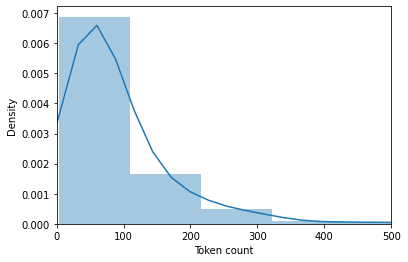

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(length)
plt.xlim([0, 500]);
plt.xlabel('Token count')
 

# Split Train Set và Test Set

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df["Comment"], df['Label'], test_size=0.2,random_state=42)

In [22]:
test = X_test.tolist()
print('Train:\n',y_train.value_counts(normalize=False))
print('Test:\n',y_test.value_counts(normalize=False))

Train:
 0    1060
1     872
Name: Label, dtype: int64
Test:
 0    262
1    221
Name: Label, dtype: int64


# Machine Learning

Vector hóa dữ liệu: TF-IDF

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_cv = cv.fit_transform(X_train)
print(X_cv.shape[1])

3922


In [24]:
tfidf = TfidfVectorizer(max_features= 3900)
X_train_tfidf = tfidf.fit_transform(X_train.astype('U')).toarray()
X_test_tfidf = tfidf.transform(X_test.astype('U')).toarray()

In [25]:
X_train_tfidf.shape

(1932, 3900)

In [26]:
# Standardize data
sc = StandardScaler()
X_train_tfidf = sc.fit_transform(X_train_tfidf)
X_test_tfidf = sc.transform(X_test_tfidf)

LR: 0.713035 (0.022724)
KNN: 0.598285 (0.036204)
DTree: 0.663632 (0.025906)
NB: 0.647142 (0.023572)
SVM: 0.706924 (0.027245)
RF: 0.733367 (0.018957)


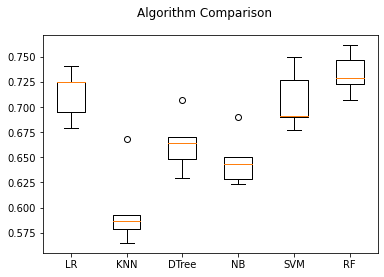

CPU times: user 1min 45s, sys: 1.83 s, total: 1min 47s
Wall time: 1min 43s


In [29]:
%%time
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTree', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF',RandomForestClassifier()))

results = []
names = []
scoring='f1_macro'
for name, model in models:
	kfold = model_selection.KFold(n_splits=5)
	cv_results = model_selection.cross_val_score(model, X_train_tfidf, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
  
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

In [30]:
%%time
#Tuning hyparameters of Random Forest
from sklearn.model_selection import GridSearchCV

grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

rf_grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_param, cv= 5,scoring='f1_macro')

rf_grid.fit(X_train_tfidf, y_train)

print(rf_grid.best_params_)
print(rf_grid.best_score_)


{'bootstrap': False, 'criterion': 'entropy', 'n_estimators': 100}
0.7517859794285153
CPU times: user 18min 11s, sys: 848 ms, total: 18min 12s
Wall time: 18min 12s


In [31]:
%%time
#Tuning hyparameters of Logistic Regression
grid_param = {"C": [0.001,0.01,0.1,1,10],
"penalty" : ['l1', 'l2']
}
lr_grid = GridSearchCV(estimator=LogisticRegression(), param_grid=grid_param, cv= 5,scoring='f1_macro')

lr_grid.fit(X_train_tfidf, y_train)

print(lr_grid.best_params_)
print(lr_grid.best_score_)

{'C': 0.01, 'penalty': 'l2'}
0.7432500811479098
CPU times: user 14.7 s, sys: 6.81 s, total: 21.5 s
Wall time: 5.5 s


In [32]:
%%time
#Tuning hyparameters of Decison Tree

grid_param = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
             'min_samples_split': [2, 3]}

DT_grid = GridSearchCV(estimator=DecisionTreeClassifier(), 
                     param_grid=grid_param, 
                     cv=5, 
                     scoring='f1_macro')

DT_grid.fit(X_train_tfidf, y_train);

print(DT_grid.best_params_)

print(DT_grid.best_score_)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 2}
0.6024965553346961
CPU times: user 39.6 s, sys: 309 ms, total: 39.9 s
Wall time: 39.6 s


In [33]:
%%time
#Tuning hyparameters of SVM
grid_param = {'C': [0.0001,0.01,0.1,1,10,100,1000],
             'gamma': [1, 0.1, 0.001, 0.0001],
             'kernel': ['linear', 'rbf']}

SVM_grid = GridSearchCV(estimator=SVC(), 
                     param_grid=grid_param, 
                     cv=5, 
                     scoring='f1_macro')

SVM_grid.fit(X_train_tfidf, y_train);

print(SVM_grid.best_params_)

print(SVM_grid.best_score_)

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.7473330560935201
CPU times: user 1h 2min, sys: 233 ms, total: 1h 2min
Wall time: 1h 2min


In [37]:
%%time
# Final Results in Test Set
models = []
models.append(SVM_grid.best_estimator_)
models.append(rf_grid.best_estimator_)
models.append(lr_grid.best_estimator_)
models.append(DT_grid.best_estimator_)

for model in models:
  y_pred = model.predict(X_test_tfidf)
  print(classification_report(y_test, y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.8027    0.6832    0.7381       262
           1     0.6808    0.8009    0.7360       221

    accuracy                         0.7371       483
   macro avg     0.7417    0.7421    0.7371       483
weighted avg     0.7469    0.7371    0.7371       483

              precision    recall  f1-score   support

           0     0.7519    0.7634    0.7576       262
           1     0.7143    0.7014    0.7078       221

    accuracy                         0.7350       483
   macro avg     0.7331    0.7324    0.7327       483
weighted avg     0.7347    0.7350    0.7348       483

              precision    recall  f1-score   support

           0     0.7913    0.7672    0.7791       262
           1     0.7336    0.7602    0.7467       221

    accuracy                         0.7640       483
   macro avg     0.7625    0.7637    0.7629       483
weighted avg     0.7649    0.7640    0.7642       483

              preci

# Bert

In [39]:

MAX_LEN = 125

train_ids = []
for sent in X_train:
    subwords = '<s> ' + bpe.encode(sent) + ' </s>'
    encoded_sent = vocab.encode_line(subwords, append_eos=True, add_if_not_exist=False).long().tolist()
    train_ids.append(encoded_sent)

test_ids = []
for sent in X_test:
    subwords = '<s> ' + bpe.encode(sent) + ' </s>'
    encoded_sent = vocab.encode_line(subwords, append_eos=True, add_if_not_exist=False).long().tolist()
    test_ids.append(encoded_sent)
    
train_ids = pad_sequences(train_ids, maxlen=MAX_LEN, dtype="long", value=0, truncating="post", padding="post")
test_ids = pad_sequences(test_ids, maxlen=MAX_LEN, dtype="long", value=0, truncating="post", padding="post")

In [40]:
train_masks = []
for sent in train_ids:
    mask = [int(token_id > 0) for token_id in sent]
    train_masks.append(mask)

test_masks = []
for sent in test_ids:
    mask = [int(token_id > 0) for token_id in sent]

    test_masks.append(mask)

In [41]:
train_inputs = torch.tensor(train_ids)
test_inputs = torch.tensor(test_ids)
y_train = torch.tensor((y_train.tolist()).copy())
y_test = torch.tensor((y_test.tolist()).copy())
train_masks = torch.tensor(train_masks)
test_masks = torch.tensor(test_masks)

train_data = TensorDataset(train_inputs, train_masks, y_train)
train_sampler = SequentialSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=32)

test_data = TensorDataset(test_inputs, test_masks, y_test)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=32)

In [42]:
from transformers import RobertaForSequenceClassification, RobertaConfig, AdamW

config = RobertaConfig.from_pretrained(
    "/content/drive/MyDrive/Colab Notebooks/PhoBERT_base_transformers/PhoBERT_base_transformers/config.json", from_tf=False, num_labels = 2, output_hidden_states=False,
)
BERT = RobertaForSequenceClassification.from_pretrained(
    "/content/drive/MyDrive/Colab Notebooks/PhoBERT_base_transformers/PhoBERT_base_transformers/model.bin",
    config=config
)

Some weights of the model checkpoint at /content/drive/MyDrive/Colab Notebooks/PhoBERT_base_transformers/PhoBERT_base_transformers/model.bin were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.decoder.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/Col

In [43]:
BERT.cuda()
print('Done')

Done


In [44]:
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    
    F1_score = f1_score(pred_flat, labels_flat, average='macro')
    
    return accuracy_score(pred_flat, labels_flat), F1_score

In [45]:
device = 'cuda'
epochs = 5

param_optimizer = list(BERT.named_parameters())
no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=1e-5, correct_bias=False)


for epoch_i in range(0, epochs):
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    total_loss = 0
    BERT.train()
    train_accuracy = 0
    nb_train_steps = 0
    train_f1 = 0
    
    for step, batch in tqdm_notebook(enumerate(train_dataloader)):
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        BERT.zero_grad()
        outputs = BERT(b_input_ids, 
            token_type_ids=None, 
            attention_mask=b_input_mask, 
            labels=b_labels)
        loss = outputs[0]
        total_loss += loss.item()
        
        logits = outputs[1].detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        tmp_train_accuracy, tmp_train_f1 = flat_accuracy(logits, label_ids)
        train_accuracy += tmp_train_accuracy
        train_f1 += tmp_train_f1
        nb_train_steps += 1
        
        loss.backward()
        torch.nn.utils.clip_grad_norm_(BERT.parameters(), 1.0)
        optimizer.step()
        
    avg_train_loss = total_loss / len(train_dataloader)
    print(" Accuracy: {0:.4f}".format(train_accuracy/nb_train_steps))
    print(" F1 score: {0:.4f}".format(train_f1/nb_train_steps))
    print(" Average training loss: {0:.4f}".format(avg_train_loss))

    print("Running Test...")
    BERT.eval()
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    eval_f1 = 0
    y_pred = []
    for batch in tqdm_notebook(test_dataloader):

        batch = tuple(t.to(device) for t in batch)

        b_input_ids, b_input_mask, b_labels = batch

        with torch.no_grad():
            outputs = BERT(b_input_ids, 
            token_type_ids=None, 
            attention_mask=b_input_mask)
            logits = outputs[0]
            
            logits = logits.detach().cpu().numpy()
            label_ids = b_labels.to('cpu').numpy()
            pred_flat = np.argmax(logits, axis=1).flatten()
            for i in pred_flat:
              y_pred.append(i)

            tmp_eval_accuracy, tmp_eval_f1 = flat_accuracy(logits, label_ids)

            eval_accuracy += tmp_eval_accuracy
            eval_f1 += tmp_eval_f1
            nb_eval_steps += 1
    print(" Accuracy: {0:.4f}".format(eval_accuracy/nb_eval_steps))
    print(" F1 score: {0:.4f}".format(eval_f1/nb_eval_steps))
print("Training complete!")

======== Epoch 1 / 5 ========
Training...



 Accuracy: 0.6749
 F1 score: 0.6306
 Average training loss: 0.5795
Running Test...



 Accuracy: 0.8086
 F1 score: 0.8019
======== Epoch 2 / 5 ========
Training...



 Accuracy: 0.8484
 F1 score: 0.8403
 Average training loss: 0.3549
Running Test...



 Accuracy: 0.8594
 F1 score: 0.8543
======== Epoch 3 / 5 ========
Training...



 Accuracy: 0.9121
 F1 score: 0.9078
 Average training loss: 0.2292
Running Test...



 Accuracy: 0.8594
 F1 score: 0.8551
======== Epoch 4 / 5 ========
Training...



 Accuracy: 0.9467
 F1 score: 0.9447
 Average training loss: 0.1584
Running Test...



 Accuracy: 0.8594
 F1 score: 0.8565
======== Epoch 5 / 5 ========
Training...



 Accuracy: 0.9580
 F1 score: 0.9563
 Average training loss: 0.1192
Running Test...



 Accuracy: 0.8438
 F1 score: 0.8380
Training complete!


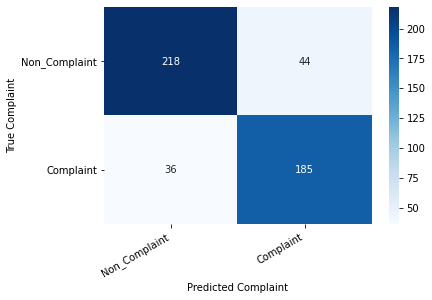

In [46]:
from sklearn.metrics import confusion_matrix
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True Complaint')
  plt.xlabel('Predicted Complaint');
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['Non_Complaint','Complaint'], columns=['Non_Complaint','Complaint'])

show_confusion_matrix(df_cm)

In [47]:
#  print('Câu bình luận không phàn nàn bị nhận nhầm:')
index_Non_False = []
for i in range(len(y_test)):
  if (y_test[i] == 0) and (y_pred[i] == 1):
    index_Non_False.append(i)
for i in index_Non_False:
  print(test[i])

đang dài mới biết được trụ được một 2 trận thì không thể_hiện được
vừa định đặt mua mà nghe nói cũng sợ sợ mình da_dầu mụn ẩn
zalo nó chỉ là ứng_dụng nhắn_tin này_nọ chứ chưa được tính là mạng xã_hội mà chưa kể nó bảo_mật được tin nhắn thông_tin tốt thì có gì đâu đã muốn cắm_sừng thì shopee ứng_dụng ngân_hàng nó còn cắm được nói gì zalo
bạn nên đổi sữa rửa mặt mình nghĩ do sữa rửa mặt kg hợp á
mới đặt mua hàng chưa về mà các chị làm em hoang_mang quá
viết về các mạng xã_hội mới nhưng lại đăng trên facebook thì ích gì hả bạn phải quảng_cáo tới những đứa trẻ mới cầm chiếc điện_thoại đầu_tiên trên tay ý
cần lắm một chị am_hiểu csd và các loai mỹ_phẩm để hướng_dẫn em từ đầu huhu em bi dính xin_lỗi trộn rồi
sau 15phut gánh team mà pin tụt có 4 quá ngầu
chắc chị mua nhầm hàng giả rồi
máy mình lla để qua đêm không sụt tí nào
mình muốn mua bột trà xanh nhưng cái này là trộn phải khạ
cũng số tiền đó có_thể mua được chiếc iphone có suất xứ tại châu_âu nhưng đa_phần mọi người mua iphone dành cho 

In [48]:
#print('Câu bình luận phàn nàn bị nhận nhầm:')
index_Com_False = []
for i in range(len(y_test)):
  if (y_test[i] == 1) and (y_pred[i] == 0):
    index_Non_False.append(i)
for i in index_Non_False:
  print(test[i])

đang dài mới biết được trụ được một 2 trận thì không thể_hiện được
vừa định đặt mua mà nghe nói cũng sợ sợ mình da_dầu mụn ẩn
zalo nó chỉ là ứng_dụng nhắn_tin này_nọ chứ chưa được tính là mạng xã_hội mà chưa kể nó bảo_mật được tin nhắn thông_tin tốt thì có gì đâu đã muốn cắm_sừng thì shopee ứng_dụng ngân_hàng nó còn cắm được nói gì zalo
bạn nên đổi sữa rửa mặt mình nghĩ do sữa rửa mặt kg hợp á
mới đặt mua hàng chưa về mà các chị làm em hoang_mang quá
viết về các mạng xã_hội mới nhưng lại đăng trên facebook thì ích gì hả bạn phải quảng_cáo tới những đứa trẻ mới cầm chiếc điện_thoại đầu_tiên trên tay ý
cần lắm một chị am_hiểu csd và các loai mỹ_phẩm để hướng_dẫn em từ đầu huhu em bi dính xin_lỗi trộn rồi
sau 15phut gánh team mà pin tụt có 4 quá ngầu
chắc chị mua nhầm hàng giả rồi
máy mình lla để qua đêm không sụt tí nào
mình muốn mua bột trà xanh nhưng cái này là trộn phải khạ
cũng số tiền đó có_thể mua được chiếc iphone có suất xứ tại châu_âu nhưng đa_phần mọi người mua iphone dành cho 

In [49]:
!git clone https://github.com/Sophie1218/-n-HMTK.git

Cloning into '-n-HMTK'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
